# Predicting Churn at QWE Inc.

* Is Wall's belief about the dependence of churn rates on customer age supported by the data? To get some intuition, try visualizing this dependence


* To start, run a single logistic regression model that best predicts the probability that a customer leaves


* What factors contribute the most to the predicted probability that these customers will leave?


* Any other better models?


* What is the predicted probability of churning for customers 672, 354, 5203? Who are the top 100 customers with highest churn probabilites?

## Summary
### We run four classification model with different setting and improvement.

*   [LR Benchmark](#Benchmark): Logistic Regression run by Statsmodel w/o split <br/>
*   [LR Sklearn with split](#Sklearn-with-split): Logistic Regression run by Sklearn with split<br/>
*   [LR Sklearn w split w Oversampling](#Sklearn-w-split-w-oversample): Logistic Regression run by Sklearn with split with oversampleing<br/>
*   [Decision Tree](#DT): Original data run by Decision Tree

<br/>

> Table 1: Model accuracy cross models

Models       | Accuracy      
---------------------    |----------------
Benchmark               | Pseudo R-squ = 0.044
statsmodel w split w oversampling               | Pseudo R-squ = 0.065
Sklearn with split      | training : 0.951, test: 0.945   
Decision Tree without Oversampling  | 0.89
Decision Tree with Oversampling | 0.97 
Random forest w oversampling | 0.989

<br/>
<br/>

> Table 2: Selected Predicted Probability cross models

Predicted Probability| Benchmark      | Sklearn with split| Statsmodel LR w split w Oversampling
---------------------|----------------|------------------|------------------
672                  | 0.038105       | 0.0611           | 0.4356
354                  | 0.047798       | 0.0882           | 0.4826
5203                 | 0.042739       | 0.0623           | 0.4542

<br/>
<br/>

What factors contribute the most to the predicted probability that these customers will leave?
<br/>
Based on Benchmark model, we calculate the [odd ratio](#odd-ratio). 





In [2]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# special matplotlib argument for improved plots
from matplotlib import rcParams
rcParams['figure.figsize'] = 12, 6


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
df = pd.read_excel('QWE.xlsx', "Case Data")
df.shape


(6347, 13)

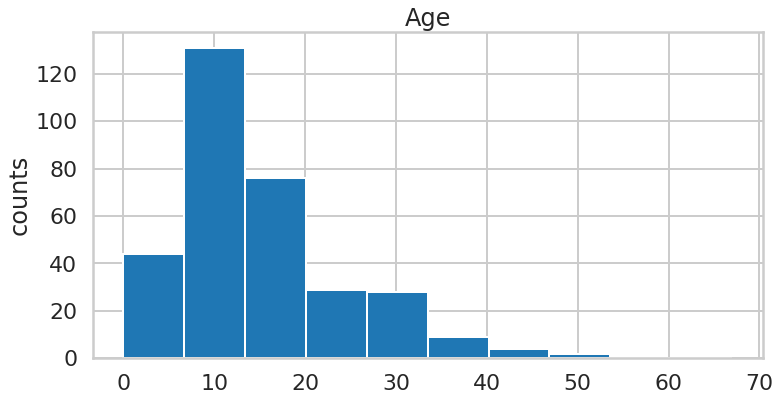

In [5]:
#you can use a weighted histogram
df.columns = ["ID","Age","Churn","CHI_0","CHI_1","Support_Cases_0","Support_Cases_1","SP_0","SP_1","Logins_1","Blogs_1", "Views_1","Days_Last_Login"]
df.hist("Age", weights=df.Churn)
plt.ylabel("counts")
plt.show()


In [6]:
df.Churn.value_counts()

0    6024
1     323
Name: Churn, dtype: int64

Text(0, 0.5, 'Frequency of Churn')

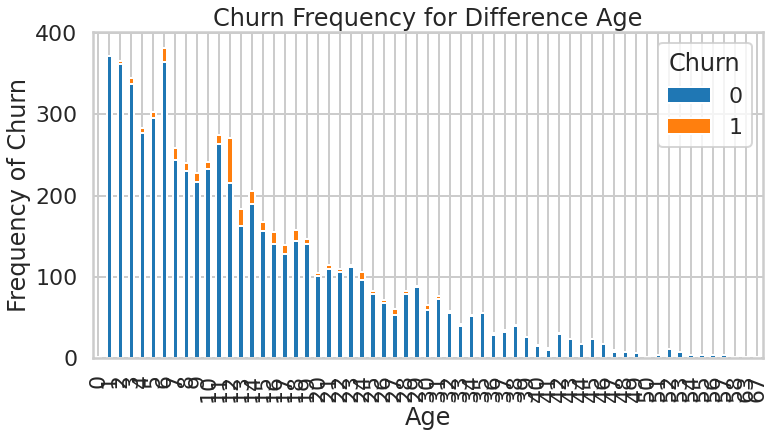

In [7]:
pd.crosstab(df.Age, df.Churn).plot(kind='bar', stacked = True)
plt.title('Churn Frequency for Difference Age')
plt.xlabel('Age')
plt.ylabel('Frequency of Churn')

In [8]:
df.groupby("Churn").mean()

,ID,Age,CHI_0,CHI_1,Support_Cases_0,Support_Cases_1,SP_0,SP_1,Logins_1,Blogs_1,Views_1,Days_Last_Login
Churn,,,,,,,,,,,,
0,3219.269588,13.818725,88.605910,5.530212,0.724270,-0.009296,0.829576,0.032682,16.138944,0.171149,106.609562,1.511454
1,2329.715170,15.352941,63.272446,-3.736842,0.371517,0.037152,0.499558,-0.016696,8.061920,-0.102167,-95.767802,6.486068


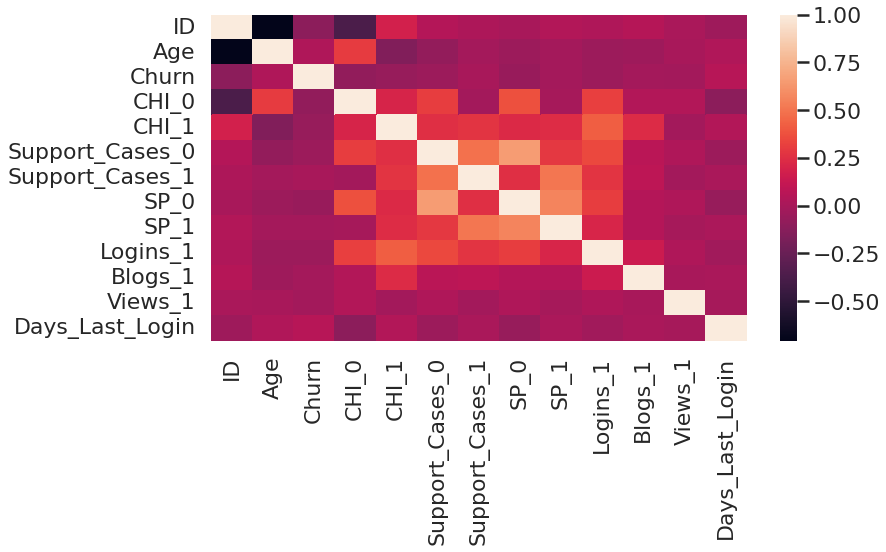

In [9]:
#correlation = df['Churn'].corr(df['Age'])
#correlation
correlation=df.corr()
sns.heatmap(correlation)


Wall's belief about the dependence of churn rates on customer age is not supported by the data.

LR Benchmark<a name="Benchmark"></a>

In [10]:
# statsmodels works nicely with pandas dataframes, import the logistic regression function
import statsmodels.api as sm
from statsmodels.formula.api import logit, glm, ols

In [11]:
#your code here : benchmark model with all features and not split train and test set
logit_model = logit('Churn ~ Age+CHI_0+CHI_1+Support_Cases_0+Support_Cases_1+SP_0+SP_1+Logins_1+Blogs_1+Views_1+Days_Last_Login',df).fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.192243
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 6347
Model:                          Logit   Df Residuals:                     6335
Method:                           MLE   Df Model:                           11
Date:                Fri, 12 Nov 2021   Pseudo R-squ.:                 0.04418
Time:                        03:18:28   Log-Likelihood:                -1220.2
converged:                       True   LL-Null:                       -1276.6
Covariance Type:            nonrobust   LLR p-value:                 5.077e-19
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -2.7627      0.107    -25.841      0.000      -2.972      -2.553
Age           

In [12]:
p = logit_model.params
print(p)

Intercept         -2.762670
Age                0.012706
CHI_0             -0.004657
CHI_1             -0.010275
Support_Cases_0   -0.152370
Support_Cases_1    0.170263
SP_0               0.015929
SP_1              -0.051937
Logins_1           0.000289
Blogs_1            0.000290
Views_1           -0.000110
Days_Last_Login    0.017242
dtype: float64


<a name="odd-ratio"></a>

In [13]:
#What factors contribute the most to the predicted probability that these customers will leave?
#odd ratio:  Δ odds > 1 -> increase churn rate,  Δ odds = 1 -> no difference,  Δ odds < 1 -> decrease churn rate
odd_ratio_df = pd.DataFrame(np.exp(p))
odd_ratio_df.columns = ["odd ratio"]
odd_ratio_df.sort_values(by= "odd ratio", ascending = False)

,odd ratio
Support_Cases_1,1.185617
Days_Last_Login,1.017392
SP_0,1.016057
Age,1.012787
Blogs_1,1.000291
Logins_1,1.000289
Views_1,0.999890
CHI_0,0.995354
CHI_1,0.989778
SP_1,0.949389


In [14]:
#What is the predicted probability of churning for customers 672, 354, 5203? Here we use the full features without Normalization Logit Regression Model
df_drop = df.drop(['ID', 'Churn'], axis = 1)
x = [672, 354, 5203]

x_prob = []

for i in x: 
  s = pd.Series(df_drop.iloc[i-1])
  eta = p['Intercept'] + p[["Age","CHI_0","CHI_1","Support_Cases_0","Support_Cases_1","SP_0","SP_1","Logins_1","Blogs_1", "Views_1","Days_Last_Login"]].dot(s)
  x_prob.append(np.exp(eta)/(1 + np.exp(eta)))


customer_prob_selected = pd.DataFrame(x_prob, x)
customer_prob_selected.columns = ["predicted probability of churning"]
print(customer_prob_selected)


      predicted probability of churning
672                            0.038105
354                            0.047798
5203                           0.042739


In [15]:
#Who are the top 100 customers with highest churn probabilites?
y_prob = []

for i in range(1,len(df)+1): 
  s = pd.Series(df_drop.iloc[i-1])
  eta = p['Intercept'] + p[["Age","CHI_0","CHI_1","Support_Cases_0","Support_Cases_1","SP_0","SP_1","Logins_1","Blogs_1", "Views_1","Days_Last_Login"]].dot(s)
  y_prob.append(np.exp(eta)/(1 + np.exp(eta)))


customer_prob = pd.DataFrame(y_prob, df.ID)
customer_prob.columns = ["predicted probability of churning"]
customer_prob

,predicted probability of churning
ID,
1,0.201510
2,0.153817
3,0.178089
4,0.003362
5,0.155130
...,...
6343,0.060089
6344,0.060089
6345,0.060089


In [ ]:
pd.options.display.float_format = '{:.4f}'.format
customer_prob_sorted = customer_prob.sort_values(by = "predicted probability of churning", ascending= False)
customer_prob_top_100 = customer_prob_sorted.iloc[:100]
customer_prob_top_100


,predicted probability of churning
ID,
2287,0.3963
357,0.3501
109,0.3004
1971,0.2471
2076,0.2162
...,...
62,0.1388
2656,0.1384
1908,0.1378


LR Sklearn with split<a name="Sklearn-with-split"></a>

In [16]:
#with sklearn and split train and test - LogisticRegression model 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.formula.api import logit, glm, ols

logit_X = df.drop(['ID', 'Churn'], axis = 1)
logit_y = df.Churn


X_train, X_test, y_train,y_test = train_test_split(logit_X, logit_y, test_size = 0.3, random_state = 0)


logit_model_sklearn = LogisticRegression()
logit_model_sklearn.fit(X_train, y_train)
print('training accuracy: {:.3f}'.format(logit_model_sklearn.score(X_train, y_train)))
print('test accuracy: {:.3f}'.format(logit_model_sklearn.score(X_test, y_test)))
intercept = logit_model_sklearn.intercept_
coef = logit_model_sklearn.coef_




training accuracy: 0.951
test accuracy: 0.945


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [17]:
#with sklearn and split train and test - LogisticRegression model - 3 selected probability
x_logit_model_sklearn = [672, 354, 5203]


x_logit_model_sklearn_prob = []

for i in x_logit_model_sklearn: 
  s = pd.Series(df_drop.iloc[i-1])
  eta = intercept + s.dot(coef.T)
  x_logit_model_sklearn_prob.append(np.exp(eta)/(1 + np.exp(eta)))

customer_prob_selected_logit_model_sklearn = pd.DataFrame(x_logit_model_sklearn_prob, x_logit_model_sklearn)
customer_prob_selected_logit_model_sklearn.columns = ["predicted probability of churning"]
customer_prob_selected_logit_model_sklearn

,predicted probability of churning
672,0.063147
354,0.079291
5203,0.050701


In [ ]:
#with sklearn and split train and test - LogisticRegression model - top 100 probability

y_logit_model_sklearn_prob = []

for i in range(1,len(df)+1): 
  s = pd.Series(df_drop.iloc[i-1])
  eta = intercept + s.dot(coef.T)
  y_logit_model_sklearn_prob.append(np.exp(eta)/(1 + np.exp(eta)))


customer_prob = pd.DataFrame(y_logit_model_sklearn_prob, df.ID)
customer_prob.columns = ["predicted probability of churning"]
customer_prob

pd.options.display.float_format = '{:.4f}'.format
customer_prob_sorted = customer_prob.sort_values(by = "predicted probability of churning", ascending= False)
customer_prob_top_100 = customer_prob_sorted.iloc[:100]
customer_prob_top_100

,predicted probability of churning
ID,
929,0.4356
2287,0.3621
109,0.3211
1971,0.2691
299,0.2561
...,...
1143,0.1429
2656,0.1428
3955,0.1427


LR (Statsmodel) w split w Oversampling<a name="Sklearn-w-split-w-oversample"></a>

In [20]:
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from imblearn.over_sampling import RandomOverSampler
import imblearn

X = df.loc[:, df.columns != 'Churn']
y = df.loc[:, df.columns == 'Churn']

#Over sampling
oversample = RandomOverSampler(sampling_strategy='minority')
X,y=oversample.fit_resample(X, y)
final = [y,X]
#type(final)
a=pd.Series(final[0])
b=pd.DataFrame(final[1])
final_df=pd.concat([a,b],axis=1)
final_df.columns = ["Churn","ID","Age","CHI_0","CHI_1","Support_Cases_0","Support_Cases_1","SP_0","SP_1","Logins_1","Blogs_1", "Views_1","Days_Last_Login"]
final_df



/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)

,Churn,ID,Age,CHI_0,CHI_1,Support_Cases_0,Support_Cases_1,SP_0,SP_1,Logins_1,Blogs_1,Views_1,Days_Last_Login
0,0,1.0,67.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0
1,0,2.0,67.0,62.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,-16.0,31.0
2,0,3.0,55.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.0
3,0,4.0,63.0,231.0,1.0,1.0,-1.0,3.0,0.0,167.0,-8.0,21996.0,0.0
4,0,5.0,57.0,43.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12043,1,4582.0,6.0,0.0,-5.0,0.0,0.0,0.0,0.0,-2.0,0.0,117.0,-24.0
12044,1,4715.0,5.0,0.0,-31.0,0.0,0.0,0.0,0.0,-10.0,0.0,243.0,0.0
12045,1,4137.0,9.0,150.0,-5.0,0.0,0.0,0.0,0.0,21.0,-8.0,0.0,0.0
12046,1,4280.0,7.0,18.0,-56.0,0.0,0.0,0.0,0.0,-6.0,-1.0,-58.0,7.0


In [22]:
final_df["Churn"].value_counts()

1    6024
0    6024
Name: Churn, dtype: int64

In [23]:
# Logisitic regression after over sampling
logit_model_df = logit('Churn ~ Age+CHI_0+CHI_1+Support_Cases_0+Support_Cases_1+SP_0+SP_1+Logins_1+Blogs_1+Views_1+Days_Last_Login',final_df).fit()
print(logit_model_df.summary())

Optimization terminated successfully.
         Current function value: 0.648023
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                12048
Model:                          Logit   Df Residuals:                    12036
Method:                           MLE   Df Model:                           11
Date:                Fri, 12 Nov 2021   Pseudo R-squ.:                 0.06510
Time:                        03:44:33   Log-Likelihood:                -7807.4
converged:                       True   LL-Null:                       -8351.0
Covariance Type:            nonrobust   LLR p-value:                3.061e-226
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.1194      0.039      3.037      0.002       0.042       0.197
Age           

In [24]:
pred1 = logit_model_df.predict(df.iloc[671])
pred2 = logit_model_df.predict(df.iloc[353])
pred3 = logit_model_df.predict(df.iloc[5202])
print(pred1,pred2,pred3)

671    0.438015
dtype: float64 353    0.492993
dtype: float64 5202    0.439674
dtype: float64


Decision Tree model

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
x= df.drop(['ID','Churn'],axis=1)
y=df["Churn"]
x_train,x_val,y_train,y_val=train_test_split(x,y,random_state=0)
Dmodel = DecisionTreeClassifier()
Dmodel.fit(x_train,y_train)
y_pred=Dmodel.predict(x_val)
res=confusion_matrix(y_val,y_pred)
print(res)

[[1428   73]
 [  74   12]]


In [34]:
Accuracy=(res[0][0]+res[1][1])/res.sum()
print("Accuracy of Decision tree model before sampling:",Accuracy)

Accuracy of Decision tree model before sampling: 0.9073724007561437


In [35]:
x1= final_df.drop(['ID','Churn'],axis=1)
y1=final_df["Churn"]
x_train,x_val,y_train,y_val=train_test_split(x1,y1,random_state=0)
Dmodel = DecisionTreeClassifier()
Dmodel.fit(x_train,y_train)
y_pred=Dmodel.predict(x_val)
res=confusion_matrix(y_val,y_pred)
print("Confusion matrix \n",res)

Confusion matrix 
 [[1399   91]
 [  11 1511]]


In [37]:
Accuracy1=(res[0][0]+res[1][1])/res.sum()
print("Accuracy of Decision tree model after over sampling:",Accuracy1)

Accuracy of Decision tree model after over sampling: 0.9661354581673307


Decision Tree model after over sampling performed better than previous models.

Random forest model

In [41]:
from sklearn.ensemble import RandomForestClassifier

forest_model = RandomForestClassifier(random_state=1)
forest_model.fit(x_train, y_train)
y_preds = forest_model.predict(x_val)
res1=confusion_matrix(y_val,y_preds)
print("Confusion matrix\n",res1)
Accuracy1=(res1[0][0]+res1[1][1])/res1.sum()
print("Accuracy of random forest model:",Accuracy1)

Confusion matrix
 [[1469   21]
 [  11 1511]]
Accuracy of random forest model: 0.9893758300132802


It is observed that Random forest model has a better accuracy prediciting the churn rate overall after over sampling.

In [ ]:
#https://stackoverflow.com/questions/53460051/convert-ipynb-notebook-to-html-in-google-colab

In [ ]:
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb

Great Job!